wkwkkwkw

`summarise()` regrouping output by 'hs' (override with `.groups` argument)
`summarise()` regrouping output by 'desc' (override with `.groups` argument)


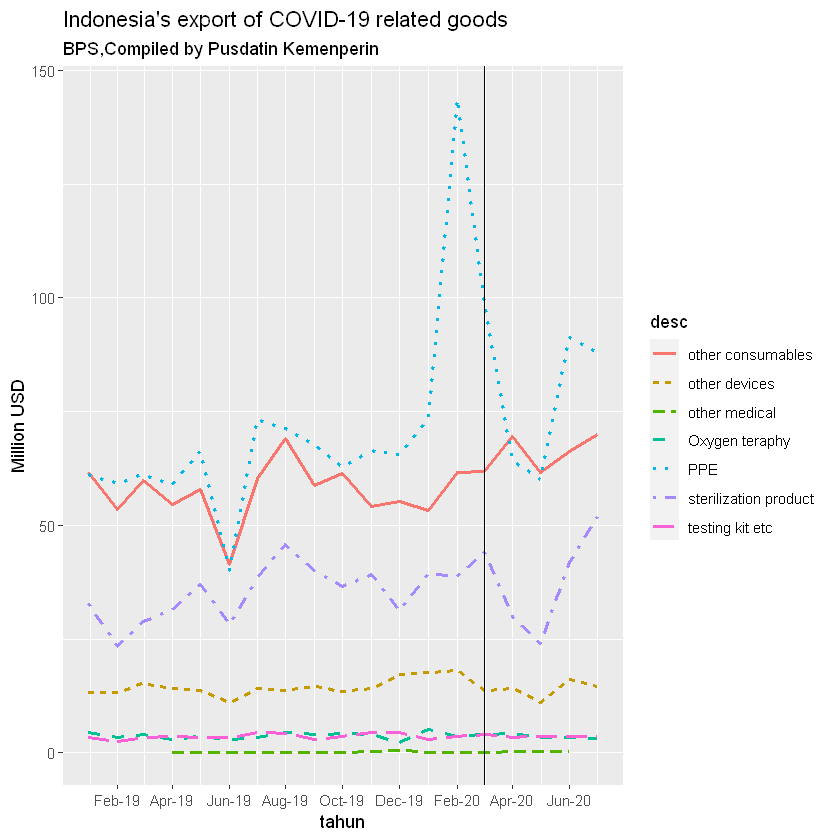

In [2]:
# Loading and cleaning the data
library(dplyr)
library(tidyverse)
library(lubridate)
library(ggplot2)

expor<-read.csv('Book1.csv') # read the data
a<-colnames(expor)           # add column names to a for easy rename
expor<-expor %>%             # rename variable names
  rename(hs=a[1],deskripsi=a[2],tujuan=a[3],periode=a[4],kg=a[5],usd=a[6])

# make periode into time series
expor$periode<-as.Date(paste0(as.character(expor$periode), '01'),format='%Y%m%d')

# Make aggregation to all countries
exporall<-expor %>% group_by(hs,periode) %>% summarise((expor=sum(usd)))
a<-colnames(exporall)
exporall<-exporall %>% rename(usd=a[3])

# Make aggregation on WCO goods classification
wco<-read.csv('wco.csv') # adding wco classification
wco<-wco %>% distinct(hshs, .keep_all = TRUE) # drop duplicates
wco$hshs<-as.character(wco$hshs) #make hshs a string so i can join them
exporall$hshs<-substr(as.character(exporall$hs),start=1,stop=6) # taking the first 6 digits
final<-inner_join(exporall,wco,by="hshs")
finall<-final %>% group_by(desc,periode) %>% summarise(expor=sum(usd))
a<-colnames(finall)
finall<-finall %>% rename(usd=a[3])
finall$usd6<-finall$usd/1000000

# plot
ggplot(finall,aes(x=periode,y=usd6, color=desc)) +
  geom_line(aes(linetype=desc),size=1.1) +
  scale_x_date(date_labels="%b-%y",date_breaks = "2 month")+
  # theme_ipsum() +
  # theme(axis.text.x=element_text(angle=60, hjust=1)) +
  geom_vline(xintercept=as.Date('20200301',format='%Y%m%d')) +
  labs(x='tahun',y="Million USD",title="Indonesia's export of COVID-19 related goods",subtitle="BPS,Compiled by Pusdatin Kemenperin")

`summarise()` regrouping output by 'hs' (override with `.groups` argument)
`summarise()` regrouping output by 'desc' (override with `.groups` argument)
Saving 6.67 x 6.67 in image


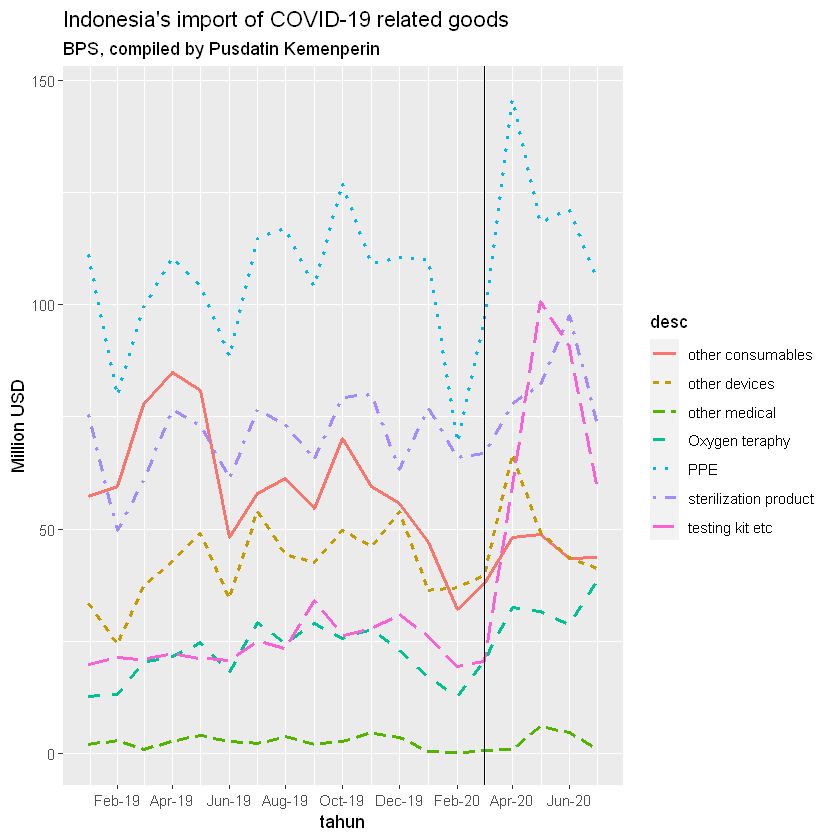

In [3]:
# Loading and cleaning the data

impor<-read.csv('impor.csv') # read the data
a<-colnames(impor)           # add column names to a for easy rename
impor<-impor %>%             # rename variable names
  rename(hs=a[1],deskripsi=a[2],asal=a[3],periode=a[4],kg=a[5],usd=a[6])

# make periode into time series
impor$periode<-as.Date(paste0(as.character(impor$periode), '01'),format='%Y%m%d')

# Make aggregation to all countries
imporall<-impor %>% group_by(hs,periode) %>% summarise((impor=sum(usd)))
a<-colnames(imporall)
imporall<-imporall %>% rename(usd=a[3])

# Make aggregation on WCO goods classification
wco<-read.csv('wco.csv') # adding wco classification
wco<-wco %>% distinct(hshs, .keep_all = TRUE) # drop duplicates
wco$hshs<-as.character(wco$hshs) #make hshs a string so i can join them
imporall$hshs<-substr(as.character(imporall$hs),start=1,stop=6) # taking the first 6 digits
final<-inner_join(imporall,wco,by="hshs")
finall<-final %>% group_by(desc,periode) %>% summarise(impor=sum(usd))
a<-colnames(finall)
finall<-finall %>% rename(usd=a[3])
finall$usd6<-finall$usd/1000000

# plot
ggplot(finall,aes(x=periode,y=usd6, color=desc)) +
  geom_line(aes(linetype=desc),size=1.1) +
  scale_x_date(date_labels="%b-%y",date_breaks = "2 month")+
  # theme_ipsum() +
  # theme(axis.text.x=element_text(angle=60, hjust=1)) +
  geom_vline(xintercept=as.Date('20200301',format='%Y%m%d')) +
  labs(x="tahun",y="Million USD",title="Indonesia's import of COVID-19 related goods", subtitle="BPS, compiled by Pusdatin Kemenperin")

wkwkwkw